In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
path = 'ex2data1.txt'
data = pd.read_csv(path, header = None, names = ['exam1','exam2','result'])
data.head()

,exam1,exam2,result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


创建散点图

In [80]:
positive = data[data['result'].isin([1])]
negative = data[data['result'].isin([0])]

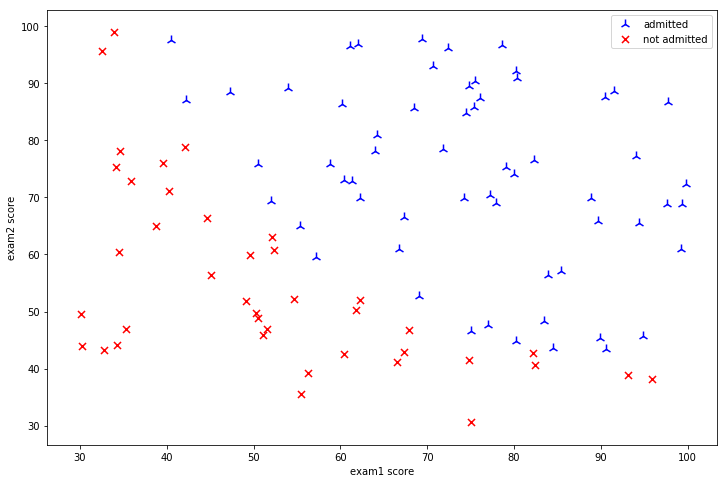

In [81]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive['exam1'], positive['exam2'], s = 100, c = 'b', marker = '2', label = 'admitted')
ax.scatter(negative['exam1'], negative['exam2'], s = 50, c = 'r', marker = 'x', label = 'not admitted')
ax.legend()
ax.set_xlabel('exam1 score')
ax.set_ylabel('exam2 score')
plt.show()

In [82]:
def sigmod(z):
    return 1/(1 + np.exp(-z))

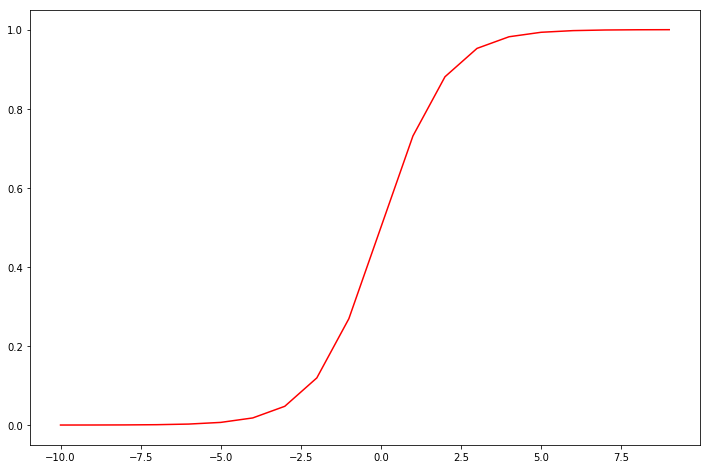

In [83]:
nums = np.arange(-10, 10, step = 1)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(nums, sigmod(nums), 'r')
plt.show()

In [84]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmod(X * theta.T)))
    second = np.multiply((1-y), np.log(1-sigmod(X * theta.T)))
    return np.sum(first - second)/(len(X))

In [85]:
data.insert(0, 'Ones', 1)
cols = data.shape[1]
X = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols-1: cols]

X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [86]:
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

In [87]:
cost(theta, X, y)

0.69314718055994529

In [88]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmod(X * theta.T) - y
    for i in range(parameters):
        term = np.multiply(error, X[:, i])
        grad[i] = np.sum(term)/len(X)
    return grad

In [89]:
gradient(theta, X , y)

array([ -0.1       , -12.00921659, -11.26284221])

In [90]:
import scipy.optimize as opt
result = opt.fmin_tnc(func = cost, x0 = theta, fprime = gradient, args= (X, y))
result

(array([-25.16131872,   0.20623159,   0.20147149]), 36, 0)

In [91]:
cost(result[0], X, y)

0.20349770158947425

In [92]:
def predict(theta, X):
    probability = sigmod(X * theta.T)
    return [1 if x >- 0.5 else 0 for x in probability]

In [93]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a==1 and b==1) or (a==0 and b==0)) else 0 for (a,b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 60%


In [94]:
box = zip(predictions, y)
print(box)